In [ ]:
!pip install torch-dreams

In [23]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import torchvision.models as models
from torch_dreams.dreamer import dreamer

In [24]:
model = models.inception_v3(pretrained=True)
dreamy_boi = dreamer(model, device = 'cuda', quiet = True)

layers_to_use = [model.Mixed_6b.branch1x1.conv]

# https://microscope.openai.com/models/inceptionv3_slim/InceptionV3_InceptionV3_Mixed_6b_Branch_0_Conv2d_0a_1x1_Relu_0?models.op.feature_vis.type=channel&models.op.technique=feature_vis


In [25]:
def make_custom_func(layer_number = 0, channel_number= 0): 
    def custom_func(layer_outputs):
        loss = layer_outputs[layer_number][channel_number].mean()
        return -loss
    return custom_func

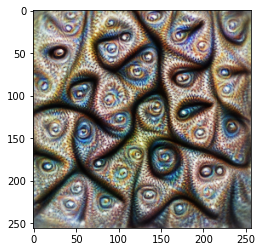

In [40]:
my_custom_func = make_custom_func(layer_number= 0, channel_number = 41)  ## 119

image_param = dreamy_boi.render(
    width = 256,
    height = 256,
    layers = layers_to_use,
    custom_func = my_custom_func,
    iters = 150
)
plt.imshow(image_param)
plt.show()

In [41]:
import imageio
def get_video_writer(filename, framerate):
    w = imageio.get_writer(filename, fps=framerate,)
    return w

In [42]:
custom_func_a = make_custom_func(layer_number= 0, channel_number = 184)  ## 119
custom_func_b = make_custom_func(layer_number= 0, channel_number = 19)
custom_func_c = make_custom_func(layer_number= 0, channel_number = 119)

In [43]:
w = get_video_writer('save_colab.mp4', 60)

from torch_dreams.auto_image_param import auto_image_param

image_param = auto_image_param(height = 512, width = 1024, standard_deviation= 0.01, device = 'cuda')

for i in tqdm(range(160)):
    image_param =  dreamy_boi.render(
        image_parameter= image_param,
        layers = layers_to_use,
        custom_func = my_custom_func,
        iters = 1,
        weight_decay = 1e-2
        )
    frame = (image_param.to_hwc_tensor()*255).to(torch.uint8).numpy()
    w.append_data(frame)

for i in tqdm(range(160)):
    image_param =  dreamy_boi.render(
        image_parameter= image_param,
        layers = layers_to_use,
        custom_func = custom_func_a,
        iters = 1,
        weight_decay = 1e-2
        )
    frame = (image_param.to_hwc_tensor()*255).to(torch.uint8).numpy()
    w.append_data(frame)


100%|██████████| 160/160 [00:20<00:00,  7.89it/s]


In [44]:
for i in tqdm(range(160)):
    image_param =  dreamy_boi.render(
        image_parameter= image_param,
        layers = layers_to_use,
        custom_func = custom_func_b,
        iters = 1,
        weight_decay = 1e-1
        )
    frame = (image_param.to_hwc_tensor()*255).to(torch.uint8).numpy()
    w.append_data(frame)
    


100%|██████████| 160/160 [00:20<00:00,  7.88it/s]


In [45]:
for i in tqdm(range(160)):
    image_param =  dreamy_boi.render(
        image_parameter= image_param,
        layers = layers_to_use,
        custom_func = custom_func_c,
        iters = 1,
        weight_decay = 1e-1
        )
    frame = (image_param.to_hwc_tensor()*255).to(torch.uint8).numpy()
    w.append_data(frame)
    


100%|██████████| 160/160 [00:20<00:00,  7.93it/s]


In [47]:
w.close()

In [48]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('save_colab.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=900 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)